In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import geopandas as gpd
import seaborn as sns
from PIL import Image

plt.rcParams['figure.figsize'] = [18, 24]

In [233]:
sns.set()

## Importing the data

In [3]:
df = pd.read_csv("uk_election_data_v2.csv")

In [4]:
df

,Constituency,Region,Con,Lab,UKIP,LD,SNP,Grn,DUP,PC,...,WinningVotes,SecondPlaceVotes,WinningPct,Majority,MajorityPct,TurnoutPct2015,RemainPct,LeavePct,LeaveMajority,2017_winner
0,Aberavon,Wales,3742.0,15416.0,4971.0,1397.0,NaN,711.0,NaN,3663.0,...,15416,4971,48.90,10445,33.13,63.3,40.1,59.9,19.8,Labour
1,Aberconwy,Wales,12513.0,8514.0,3467.0,1391.0,NaN,727.0,NaN,3536.0,...,12513,8514,39.69,3999,13.26,66.2,46.7,53.3,6.6,Conservative
2,Aberdeen North,Scotland,5304.0,11397.0,NaN,2050.0,24793.0,NaN,NaN,NaN,...,24793,11397,56.43,13396,30.49,64.9,57.0,43.0,-14.0,SNP
3,Aberdeen South,Scotland,11087.0,12991.0,897.0,2252.0,20221.0,964.0,NaN,NaN,...,20221,12991,41.65,7230,14.89,71.3,67.7,32.3,-35.4,Conservative
4,Airdrie and Shotts,Scotland,3389.0,15108.0,1088.0,678.0,23887.0,NaN,NaN,NaN,...,23887,15108,53.94,8779,19.82,66.4,60.0,40.0,-20.0,SNP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,Wythenshawe and Sale East,North West England,11124.0,21693.0,6354.0,1927.0,NaN,1658.0,NaN,NaN,...,21693,11124,50.10,10569,24.43,56.9,50.2,49.8,-0.4,Labour
646,Yeovil,South West England,24178.0,4053.0,7646.0,18865.0,NaN,2191.0,NaN,NaN,...,24178,18865,42.50,5313,9.33,69.1,40.8,59.2,18.4,Conservative
647,Ynys Mon,Wales,7393.0,10871.0,5121.0,751.0,NaN,NaN,NaN,10642.0,...,10871,10642,31.10,229,0.66,69.9,49.1,50.9,1.8,Labour
648,York Central,Yorkshire and the Humber,13496.0,20212.0,4795.0,3804.0,NaN,4791.0,NaN,NaN,...,20212,13496,42.40,6716,14.09,63.3,61.5,38.5,-23.0,Labour


In [5]:
df.columns

Index(['Constituency', 'Region', 'Con', 'Lab', 'UKIP', 'LD', 'SNP', 'Grn',
       'DUP', 'PC', 'SF', 'UUP', 'SDLP', 'Alliance', 'Ind', 'Spk', 'Others',
       'ValidVotes', 'WinningParty', 'SecondPlace', 'WinningVotes',
       'SecondPlaceVotes', 'WinningPct', 'Majority', 'MajorityPct',
       'TurnoutPct2015', 'RemainPct', 'LeavePct', 'LeaveMajority',
       '2017_winner'],
      dtype='object')

In [6]:
df = df.fillna(0)

In [7]:
df.columns[2:17]

Index(['Con', 'Lab', 'UKIP', 'LD', 'SNP', 'Grn', 'DUP', 'PC', 'SF', 'UUP',
       'SDLP', 'Alliance', 'Ind', 'Spk', 'Others'],
      dtype='object')

In [8]:
df["con_ratio"] = (df["Con"] + df["UKIP"])/df.iloc[:, 2:17].sum(axis=1)

In [10]:
df["leave_prop"] = df["LeavePct"]/100

In [11]:
df

,Constituency,Region,Con,Lab,UKIP,LD,SNP,Grn,DUP,PC,...,WinningPct,Majority,MajorityPct,TurnoutPct2015,RemainPct,LeavePct,LeaveMajority,2017_winner,con_ratio,leave_prop
0,Aberavon,Wales,3742.0,15416.0,4971.0,1397.0,0.0,711.0,0.0,3663.0,...,48.90,10445,33.13,63.3,40.1,59.9,19.8,Labour,0.276401,0.599
1,Aberconwy,Wales,12513.0,8514.0,3467.0,1391.0,0.0,727.0,0.0,3536.0,...,39.69,3999,13.26,66.2,46.7,53.3,6.6,Conservative,0.530052,0.533
2,Aberdeen North,Scotland,5304.0,11397.0,0.0,2050.0,24793.0,0.0,0.0,0.0,...,56.43,13396,30.49,64.9,57.0,43.0,-14.0,SNP,0.120721,0.430
3,Aberdeen South,Scotland,11087.0,12991.0,897.0,2252.0,20221.0,964.0,0.0,0.0,...,41.65,7230,14.89,71.3,67.7,32.3,-35.4,Conservative,0.246833,0.323
4,Airdrie and Shotts,Scotland,3389.0,15108.0,1088.0,678.0,23887.0,0.0,0.0,0.0,...,53.94,8779,19.82,66.4,60.0,40.0,-20.0,SNP,0.101093,0.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,Wythenshawe and Sale East,North West England,11124.0,21693.0,6354.0,1927.0,0.0,1658.0,0.0,0.0,...,50.10,10569,24.43,56.9,50.2,49.8,-0.4,Labour,0.403994,0.498
646,Yeovil,South West England,24178.0,4053.0,7646.0,18865.0,0.0,2191.0,0.0,0.0,...,42.50,5313,9.33,69.1,40.8,59.2,18.4,Conservative,0.558973,0.592
647,Ynys Mon,Wales,7393.0,10871.0,5121.0,751.0,0.0,0.0,0.0,10642.0,...,31.10,229,0.66,69.9,49.1,50.9,1.8,Labour,0.358300,0.509
648,York Central,Yorkshire and the Humber,13496.0,20212.0,4795.0,3804.0,0.0,4791.0,0.0,0.0,...,42.40,6716,14.09,63.3,61.5,38.5,-23.0,Labour,0.383644,0.385


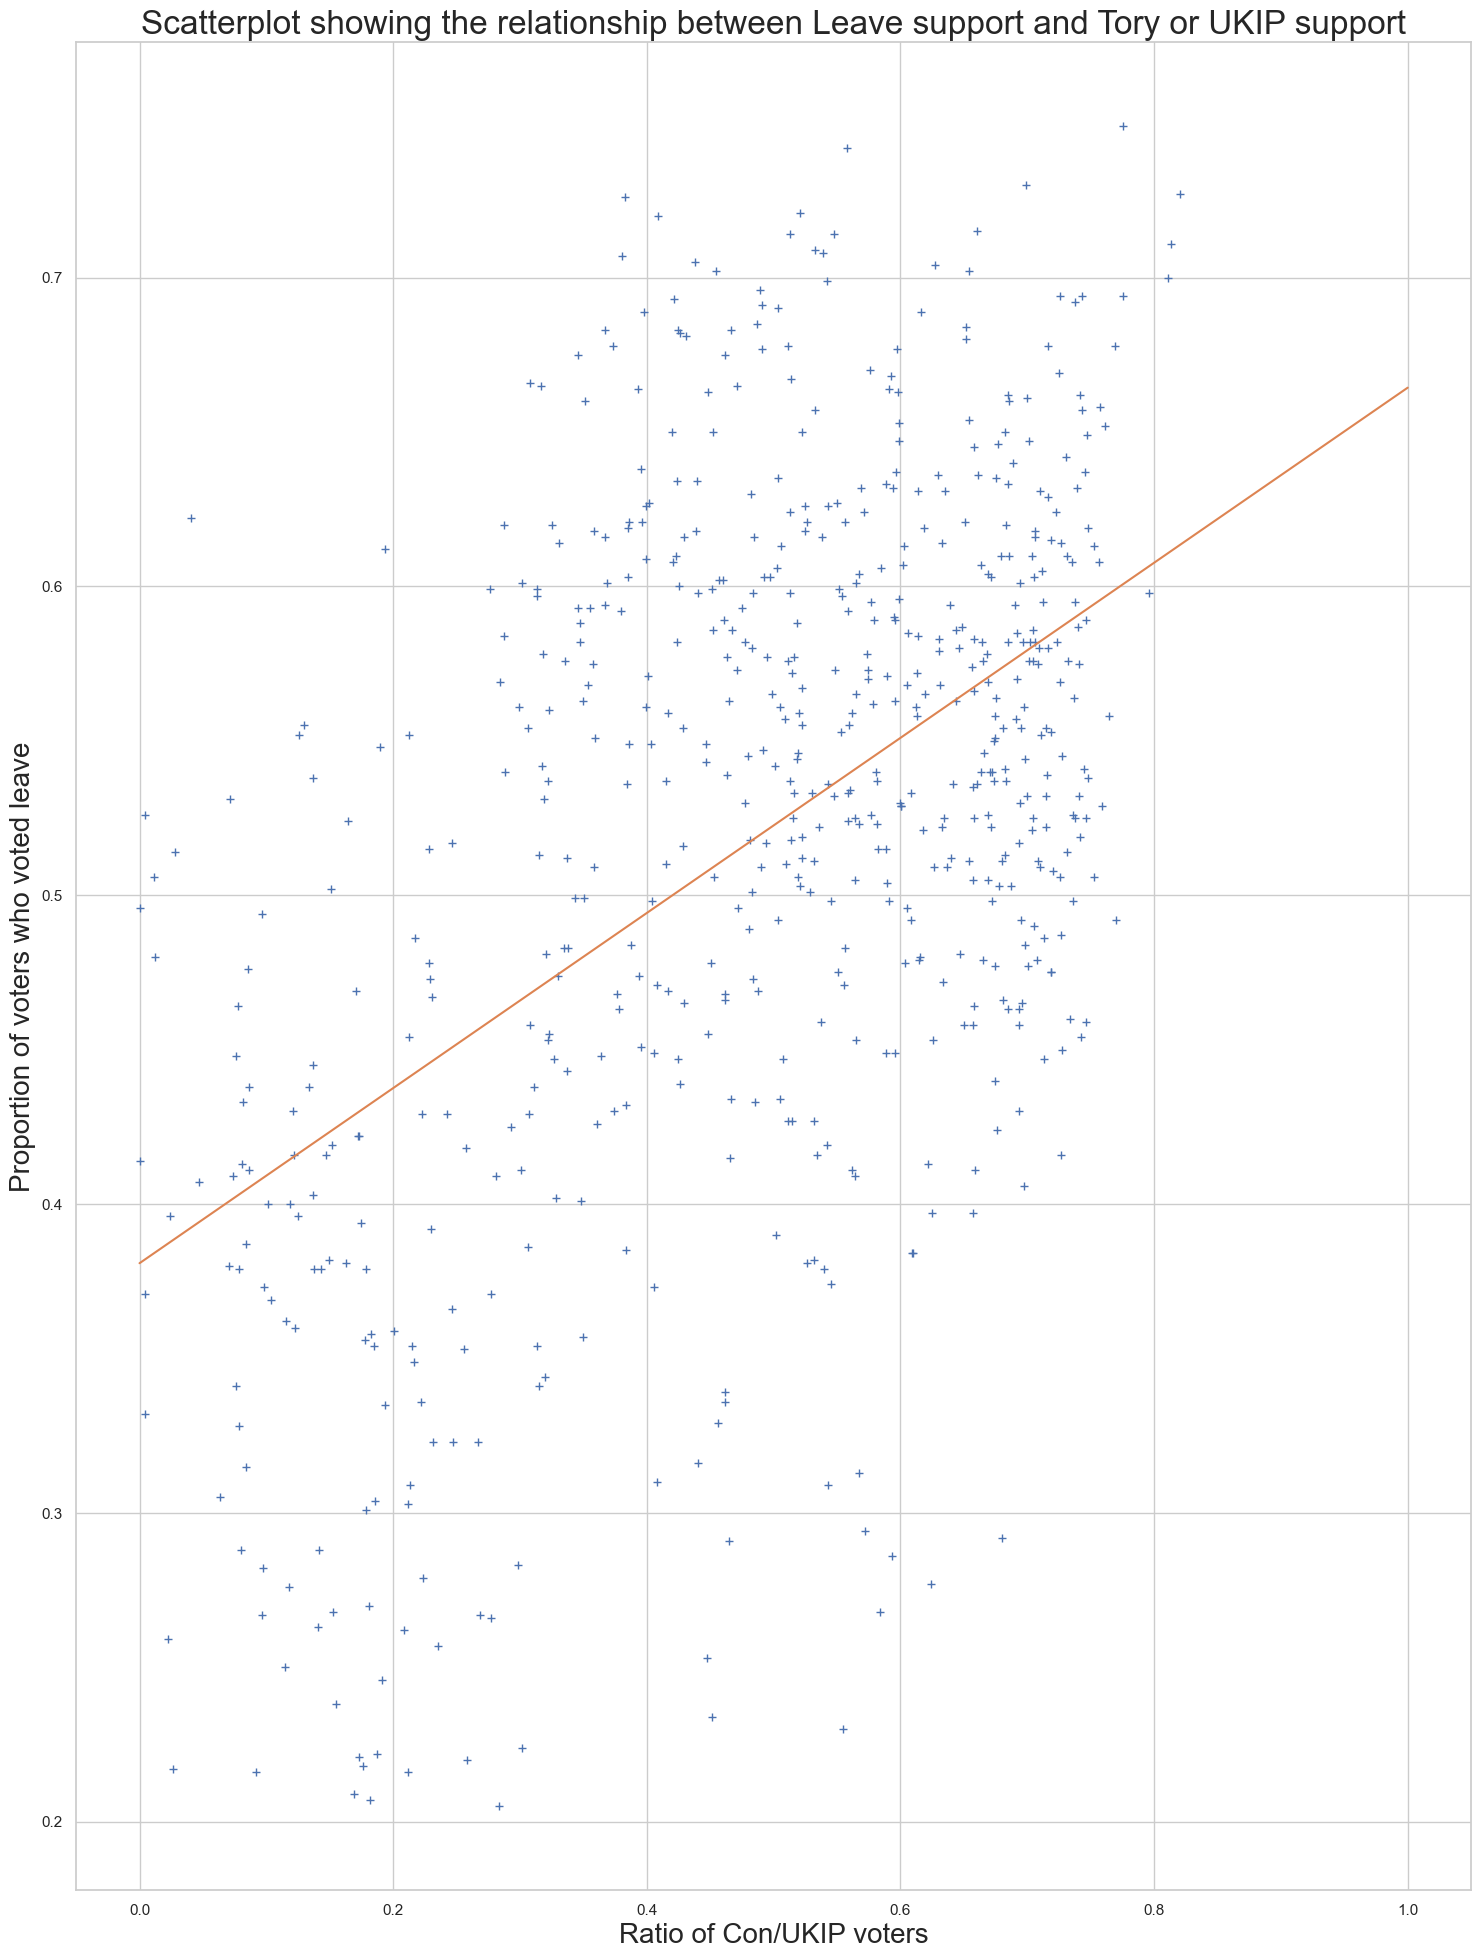

In [268]:
plt.plot(df["con_ratio"], df["leave_prop"], "+")
slope, intercept = np.polyfit(df["con_ratio"], df["leave_prop"], 1)
xx = np.linspace(0, 1)
plt.plot(xx, intercept+xx*slope)
plt.title("Scatterplot showing the relationship between Leave support and Tory or UKIP support", fontsize=24)
plt.xlabel("Ratio of Con/UKIP voters", fontsize=20)
plt.ylabel("Proportion of voters who voted leave", fontsize=20)
plt.savefig('politics_scatterplot.jpg', format='jpg', dpi=400, bbox_inches='tight')

In [13]:
df["con_ratio"].corr(df["leave_prop"])

0.4959820006260413

In [14]:
df["prod_var"] = df["con_ratio"] * (df["leave_prop"])

In [15]:
df

,Constituency,Region,Con,Lab,UKIP,LD,SNP,Grn,DUP,PC,...,Majority,MajorityPct,TurnoutPct2015,RemainPct,LeavePct,LeaveMajority,2017_winner,con_ratio,leave_prop,prod_var
0,Aberavon,Wales,3742.0,15416.0,4971.0,1397.0,0.0,711.0,0.0,3663.0,...,10445,33.13,63.3,40.1,59.9,19.8,Labour,0.276401,0.599,0.165564
1,Aberconwy,Wales,12513.0,8514.0,3467.0,1391.0,0.0,727.0,0.0,3536.0,...,3999,13.26,66.2,46.7,53.3,6.6,Conservative,0.530052,0.533,0.282518
2,Aberdeen North,Scotland,5304.0,11397.0,0.0,2050.0,24793.0,0.0,0.0,0.0,...,13396,30.49,64.9,57.0,43.0,-14.0,SNP,0.120721,0.430,0.051910
3,Aberdeen South,Scotland,11087.0,12991.0,897.0,2252.0,20221.0,964.0,0.0,0.0,...,7230,14.89,71.3,67.7,32.3,-35.4,Conservative,0.246833,0.323,0.079727
4,Airdrie and Shotts,Scotland,3389.0,15108.0,1088.0,678.0,23887.0,0.0,0.0,0.0,...,8779,19.82,66.4,60.0,40.0,-20.0,SNP,0.101093,0.400,0.040437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,Wythenshawe and Sale East,North West England,11124.0,21693.0,6354.0,1927.0,0.0,1658.0,0.0,0.0,...,10569,24.43,56.9,50.2,49.8,-0.4,Labour,0.403994,0.498,0.201189
646,Yeovil,South West England,24178.0,4053.0,7646.0,18865.0,0.0,2191.0,0.0,0.0,...,5313,9.33,69.1,40.8,59.2,18.4,Conservative,0.558973,0.592,0.330912
647,Ynys Mon,Wales,7393.0,10871.0,5121.0,751.0,0.0,0.0,0.0,10642.0,...,229,0.66,69.9,49.1,50.9,1.8,Labour,0.358300,0.509,0.182375
648,York Central,Yorkshire and the Humber,13496.0,20212.0,4795.0,3804.0,0.0,4791.0,0.0,0.0,...,6716,14.09,63.3,61.5,38.5,-23.0,Labour,0.383644,0.385,0.147703


In [16]:
df.describe()

,Con,Lab,UKIP,LD,SNP,Grn,DUP,PC,SF,UUP,...,WinningPct,Majority,MajorityPct,TurnoutPct2015,RemainPct,LeavePct,LeaveMajority,con_ratio,leave_prop,prod_var
count,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,...,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,17384.567692,14380.467692,5970.921538,3716.710769,2237.593846,1780.943077,283.476923,279.544615,271.126154,176.823077,...,49.787662,11478.930769,24.073123,53.084015,48.190154,51.818769,3.628615,0.484445,0.518188,0.262460
std,9405.794586,7411.664181,3068.353598,4238.213782,7243.263179,1602.188194,2000.244194,1371.160216,2037.219340,1459.175983,...,7.609409,7090.955203,13.955863,26.933850,11.486188,11.484459,22.970014,0.200912,0.114845,0.130494
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,24.500000,27.000000,0.060000,0.000000,25.100000,20.500000,-59.000000,0.000000,0.205000,0.000000
25%,8808.000000,8447.750000,4050.250000,1309.000000,0.000000,1032.500000,0.000000,0.000000,0.000000,0.000000,...,43.825000,5610.750000,12.732500,56.300000,40.025000,45.150000,-9.700000,0.347498,0.451500,0.169340
50%,17856.000000,14350.000000,6289.000000,2120.500000,0.000000,1522.500000,0.000000,0.000000,0.000000,0.000000,...,49.640000,10821.500000,24.265000,64.900000,46.400000,53.600000,7.200000,0.519794,0.536000,0.282857
75%,25384.750000,19279.000000,7864.500000,4197.500000,0.000000,2256.500000,0.000000,0.000000,0.000000,0.000000,...,54.700000,16705.250000,33.970000,69.900000,54.850000,59.975000,19.950000,0.658066,0.599750,0.362121
max,36607.000000,40563.000000,19642.000000,25194.000000,34831.000000,22871.000000,19575.000000,15140.000000,23078.000000,23608.000000,...,81.300000,34655.000000,72.330000,81.910000,79.500000,74.900000,49.800000,0.820462,0.749000,0.596476


In [17]:
df["prod_var"].max()

0.5964759075907591

In [18]:
df["prod_var"].min()

0.0

In [19]:
uk_consts = gpd.read_file("uk_consts.geojson")

In [20]:
uk_consts = uk_consts.sort_values(by='PCON21NM')

uk_consts

,OBJECTID,PCON21CD,PCON21NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
618,619,W07000049,Aberavon,281995,189115,-3.70476,51.58849,19512a3e-da10-40aa-8b58-63c4d95ebddc,"MULTIPOLYGON (((272080.903 198199.495, 272120...."
627,628,W07000058,Aberconwy,276098,360879,-3.85333,53.13064,905b3135-3985-442f-9d4d-94289f069daa,"MULTIPOLYGON (((277675.810 368265.290, 277663...."
551,552,S14000001,Aberdeen North,389796,808947,-2.17038,57.17123,d7aaa252-2998-4395-a5f8-1d1ddb181ca9,"MULTIPOLYGON (((393806.950 809630.000, 393801...."
552,553,S14000002,Aberdeen South,384014,802600,-2.26559,57.11405,ec5c9e47-032a-4498-9cc2-9acbb07b24ba,"MULTIPOLYGON (((396494.604 802552.201, 396491...."
553,554,S14000003,Airdrie and Shotts,283330,662650,-3.86475,55.84290,a782a886-3175-4124-9338-7aa87fa46a3f,"POLYGON ((290853.901 662155.299, 290854.198 66..."
...,...,...,...,...,...,...,...,...,...
529,530,E14001059,Wythenshawe and Sale East,380730,389917,-2.29132,53.40573,844ba253-84d6-4666-86ed-ede3c807e045,"POLYGON ((380187.802 393434.200, 380181.000 39..."
530,531,E14001060,Yeovil,340522,114840,-2.84771,50.92992,e9efc171-7d47-45ab-b528-a44898f02899,"POLYGON ((355919.100 126776.700, 355912.999 12..."
610,611,W07000041,Ynys Mon,245217,378331,-4.32298,53.27931,05d45682-3ad5-4665-91ec-f3ec0ebc0479,"MULTIPOLYGON (((239052.158 363430.995, 239058...."
531,532,E14001061,York Central,459887,451276,-1.08890,53.95413,0b4d7d08-bcde-43fc-8b4c-a662506a6009,"POLYGON ((459954.704 454309.005, 460000.002 45..."


In [21]:
df = df.sort_values(by='Constituency')

df

,Constituency,Region,Con,Lab,UKIP,LD,SNP,Grn,DUP,PC,...,Majority,MajorityPct,TurnoutPct2015,RemainPct,LeavePct,LeaveMajority,2017_winner,con_ratio,leave_prop,prod_var
0,Aberavon,Wales,3742.0,15416.0,4971.0,1397.0,0.0,711.0,0.0,3663.0,...,10445,33.13,63.3,40.1,59.9,19.8,Labour,0.276401,0.599,0.165564
1,Aberconwy,Wales,12513.0,8514.0,3467.0,1391.0,0.0,727.0,0.0,3536.0,...,3999,13.26,66.2,46.7,53.3,6.6,Conservative,0.530052,0.533,0.282518
2,Aberdeen North,Scotland,5304.0,11397.0,0.0,2050.0,24793.0,0.0,0.0,0.0,...,13396,30.49,64.9,57.0,43.0,-14.0,SNP,0.120721,0.430,0.051910
3,Aberdeen South,Scotland,11087.0,12991.0,897.0,2252.0,20221.0,964.0,0.0,0.0,...,7230,14.89,71.3,67.7,32.3,-35.4,Conservative,0.246833,0.323,0.079727
4,Airdrie and Shotts,Scotland,3389.0,15108.0,1088.0,678.0,23887.0,0.0,0.0,0.0,...,8779,19.82,66.4,60.0,40.0,-20.0,SNP,0.101093,0.400,0.040437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,Wythenshawe and Sale East,North West England,11124.0,21693.0,6354.0,1927.0,0.0,1658.0,0.0,0.0,...,10569,24.43,56.9,50.2,49.8,-0.4,Labour,0.403994,0.498,0.201189
646,Yeovil,South West England,24178.0,4053.0,7646.0,18865.0,0.0,2191.0,0.0,0.0,...,5313,9.33,69.1,40.8,59.2,18.4,Conservative,0.558973,0.592,0.330912
647,Ynys Mon,Wales,7393.0,10871.0,5121.0,751.0,0.0,0.0,0.0,10642.0,...,229,0.66,69.9,49.1,50.9,1.8,Labour,0.358300,0.509,0.182375
648,York Central,Yorkshire and the Humber,13496.0,20212.0,4795.0,3804.0,0.0,4791.0,0.0,0.0,...,6716,14.09,63.3,61.5,38.5,-23.0,Labour,0.383644,0.385,0.147703


In [22]:
merge_df = uk_consts.merge(df, how="left", left_on="PCON21NM", right_on="Constituency")

In [23]:
merge_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 650 entries, 0 to 649
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   OBJECTID          650 non-null    int64   
 1   PCON21CD          650 non-null    object  
 2   PCON21NM          650 non-null    object  
 3   BNG_E             650 non-null    int64   
 4   BNG_N             650 non-null    int64   
 5   LONG              650 non-null    float64 
 6   LAT               650 non-null    float64 
 7   GlobalID          650 non-null    object  
 8   geometry          650 non-null    geometry
 9   Constituency      650 non-null    object  
 10  Region            650 non-null    object  
 11  Con               650 non-null    float64 
 12  Lab               650 non-null    float64 
 13  UKIP              650 non-null    float64 
 14  LD                650 non-null    float64 
 15  SNP               650 non-null    float64 
 16  Grn               

In [24]:
merge_df

,OBJECTID,PCON21CD,PCON21NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,Constituency,...,Majority,MajorityPct,TurnoutPct2015,RemainPct,LeavePct,LeaveMajority,2017_winner,con_ratio,leave_prop,prod_var
0,619,W07000049,Aberavon,281995,189115,-3.70476,51.58849,19512a3e-da10-40aa-8b58-63c4d95ebddc,"MULTIPOLYGON (((272080.903 198199.495, 272120....",Aberavon,...,10445,33.13,63.3,40.1,59.9,19.8,Labour,0.276401,0.599,0.165564
1,628,W07000058,Aberconwy,276098,360879,-3.85333,53.13064,905b3135-3985-442f-9d4d-94289f069daa,"MULTIPOLYGON (((277675.810 368265.290, 277663....",Aberconwy,...,3999,13.26,66.2,46.7,53.3,6.6,Conservative,0.530052,0.533,0.282518
2,552,S14000001,Aberdeen North,389796,808947,-2.17038,57.17123,d7aaa252-2998-4395-a5f8-1d1ddb181ca9,"MULTIPOLYGON (((393806.950 809630.000, 393801....",Aberdeen North,...,13396,30.49,64.9,57.0,43.0,-14.0,SNP,0.120721,0.430,0.051910
3,553,S14000002,Aberdeen South,384014,802600,-2.26559,57.11405,ec5c9e47-032a-4498-9cc2-9acbb07b24ba,"MULTIPOLYGON (((396494.604 802552.201, 396491....",Aberdeen South,...,7230,14.89,71.3,67.7,32.3,-35.4,Conservative,0.246833,0.323,0.079727
4,554,S14000003,Airdrie and Shotts,283330,662650,-3.86475,55.84290,a782a886-3175-4124-9338-7aa87fa46a3f,"POLYGON ((290853.901 662155.299, 290854.198 66...",Airdrie and Shotts,...,8779,19.82,66.4,60.0,40.0,-20.0,SNP,0.101093,0.400,0.040437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,530,E14001059,Wythenshawe and Sale East,380730,389917,-2.29132,53.40573,844ba253-84d6-4666-86ed-ede3c807e045,"POLYGON ((380187.802 393434.200, 380181.000 39...",Wythenshawe and Sale East,...,10569,24.43,56.9,50.2,49.8,-0.4,Labour,0.403994,0.498,0.201189
646,531,E14001060,Yeovil,340522,114840,-2.84771,50.92992,e9efc171-7d47-45ab-b528-a44898f02899,"POLYGON ((355919.100 126776.700, 355912.999 12...",Yeovil,...,5313,9.33,69.1,40.8,59.2,18.4,Conservative,0.558973,0.592,0.330912
647,611,W07000041,Ynys Mon,245217,378331,-4.32298,53.27931,05d45682-3ad5-4665-91ec-f3ec0ebc0479,"MULTIPOLYGON (((239052.158 363430.995, 239058....",Ynys Mon,...,229,0.66,69.9,49.1,50.9,1.8,Labour,0.358300,0.509,0.182375
648,532,E14001061,York Central,459887,451276,-1.08890,53.95413,0b4d7d08-bcde-43fc-8b4c-a662506a6009,"POLYGON ((459954.704 454309.005, 460000.002 45...",York Central,...,6716,14.09,63.3,61.5,38.5,-23.0,Labour,0.383644,0.385,0.147703


In [25]:
merge_df.iloc[139]

OBJECTID                                                          111
PCON21CD                                                    E14000640
PCON21NM                                              City of Chester
BNG_E                                                          339232
BNG_N                                                          361928
LONG                                                          -2.9101
LAT                                                          53.15102
GlobalID                         3f7d5cc5-e395-4813-a7b3-c5c6149e250d
geometry            POLYGON ((346137.7037 369314.404200001, 346134...
Constituency                                          City of Chester
Region                                             North West England
Con                                                           22025.0
Lab                                                           22118.0
UKIP                                                           4148.0
LD                  

In [26]:
"""for a,b  in list(zip(uk_consts["PCON21NM"], df["Constituency"])):
    
    if a != b:
        print("ISSUE:")
    print(a, "||", b)
    print("\n")"""

'for a,b  in list(zip(uk_consts["PCON21NM"], df["Constituency"])):\n    \n    if a != b:\n        print("ISSUE:")\n    print(a, "||", b)\n    print("\n")'

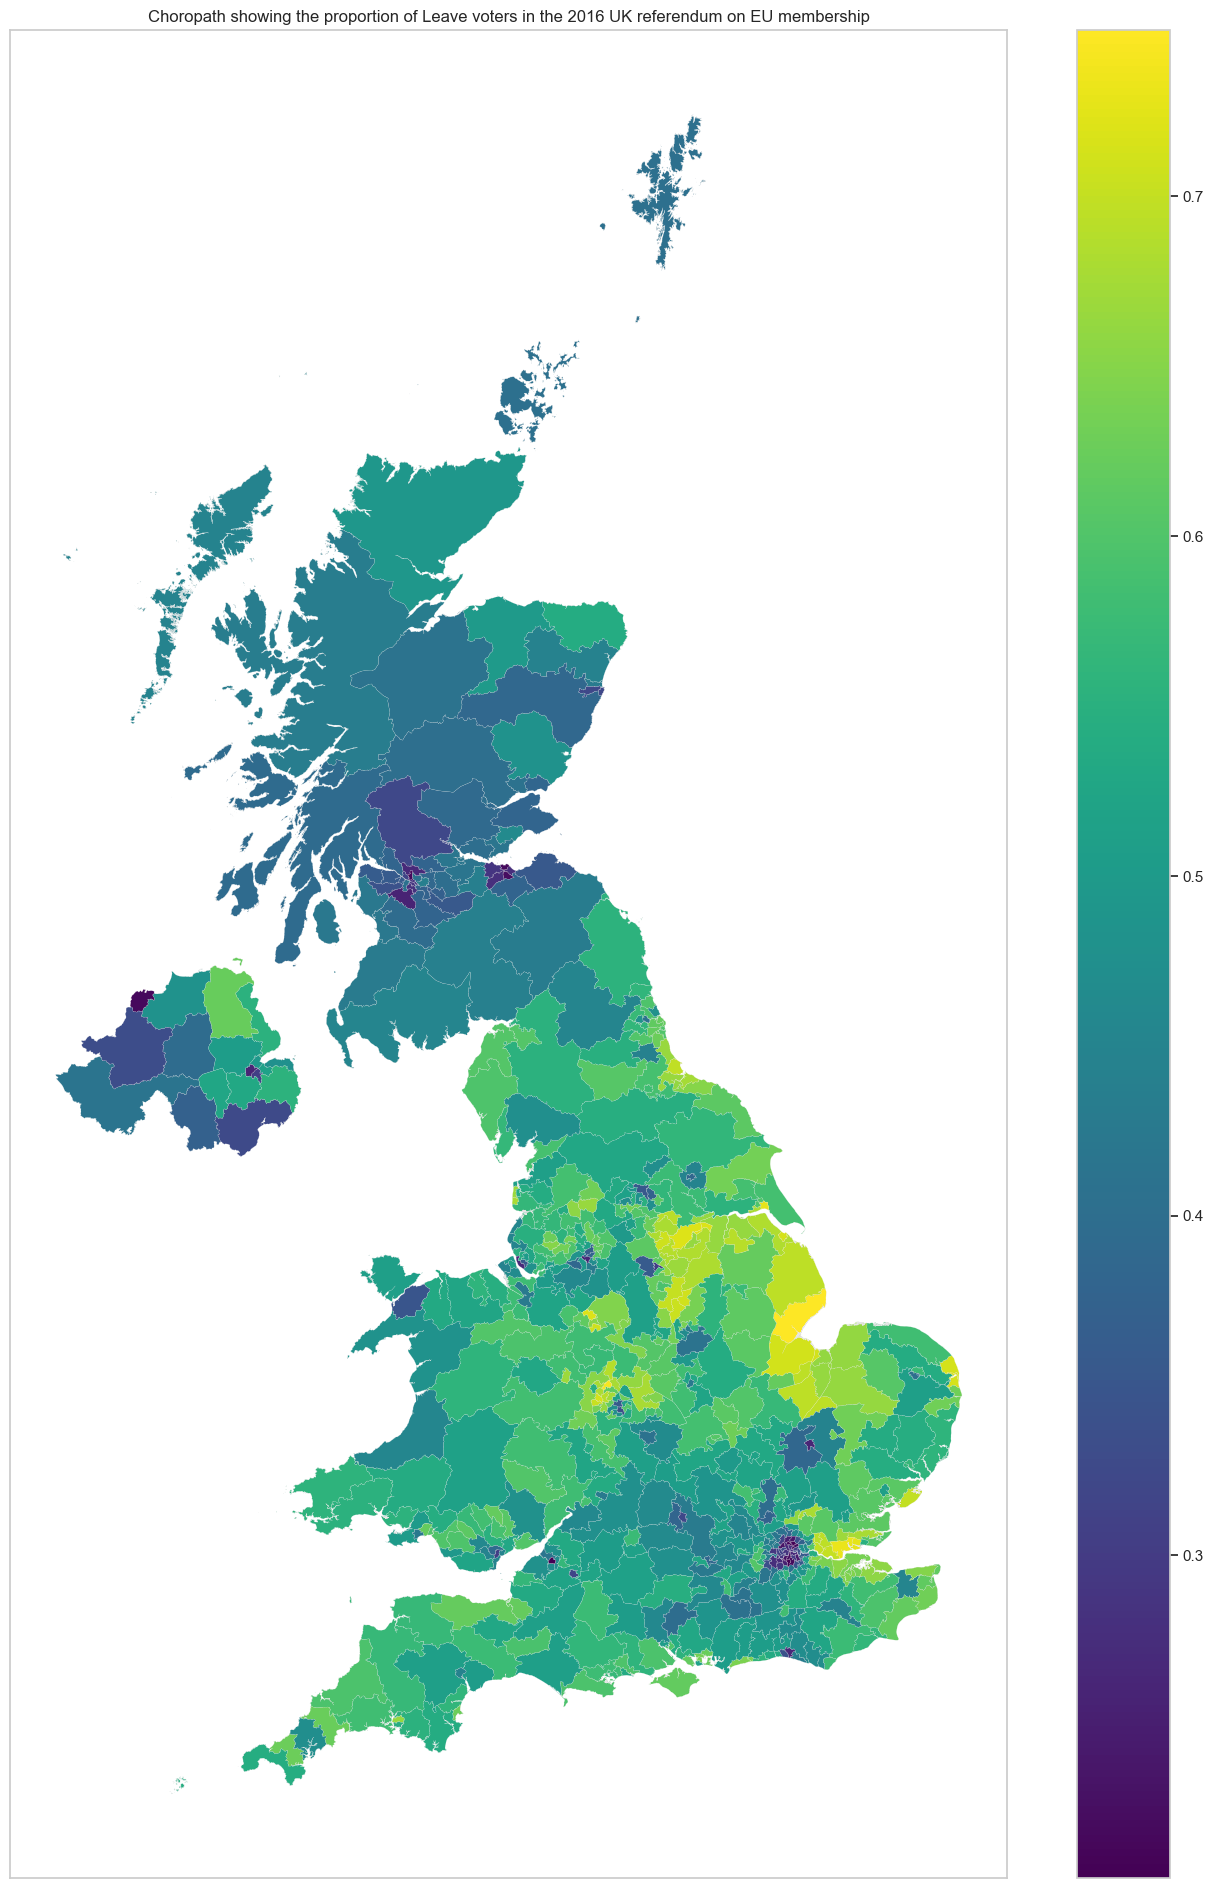

In [269]:
merge_df.plot(column="leave_prop", cmap="viridis", linewidth=0.1, edgecolor='0.9', legend=True)
plt.xticks([])
plt.yticks([])
plt.title("Choropath showing the proportion of Leave voters in the 2016 UK referendum on EU membership")
plt.grid()
#plt.savefig('leave_voting.jpg', format='jpg', dpi=400, bbox_inches='tight')
plt.show()

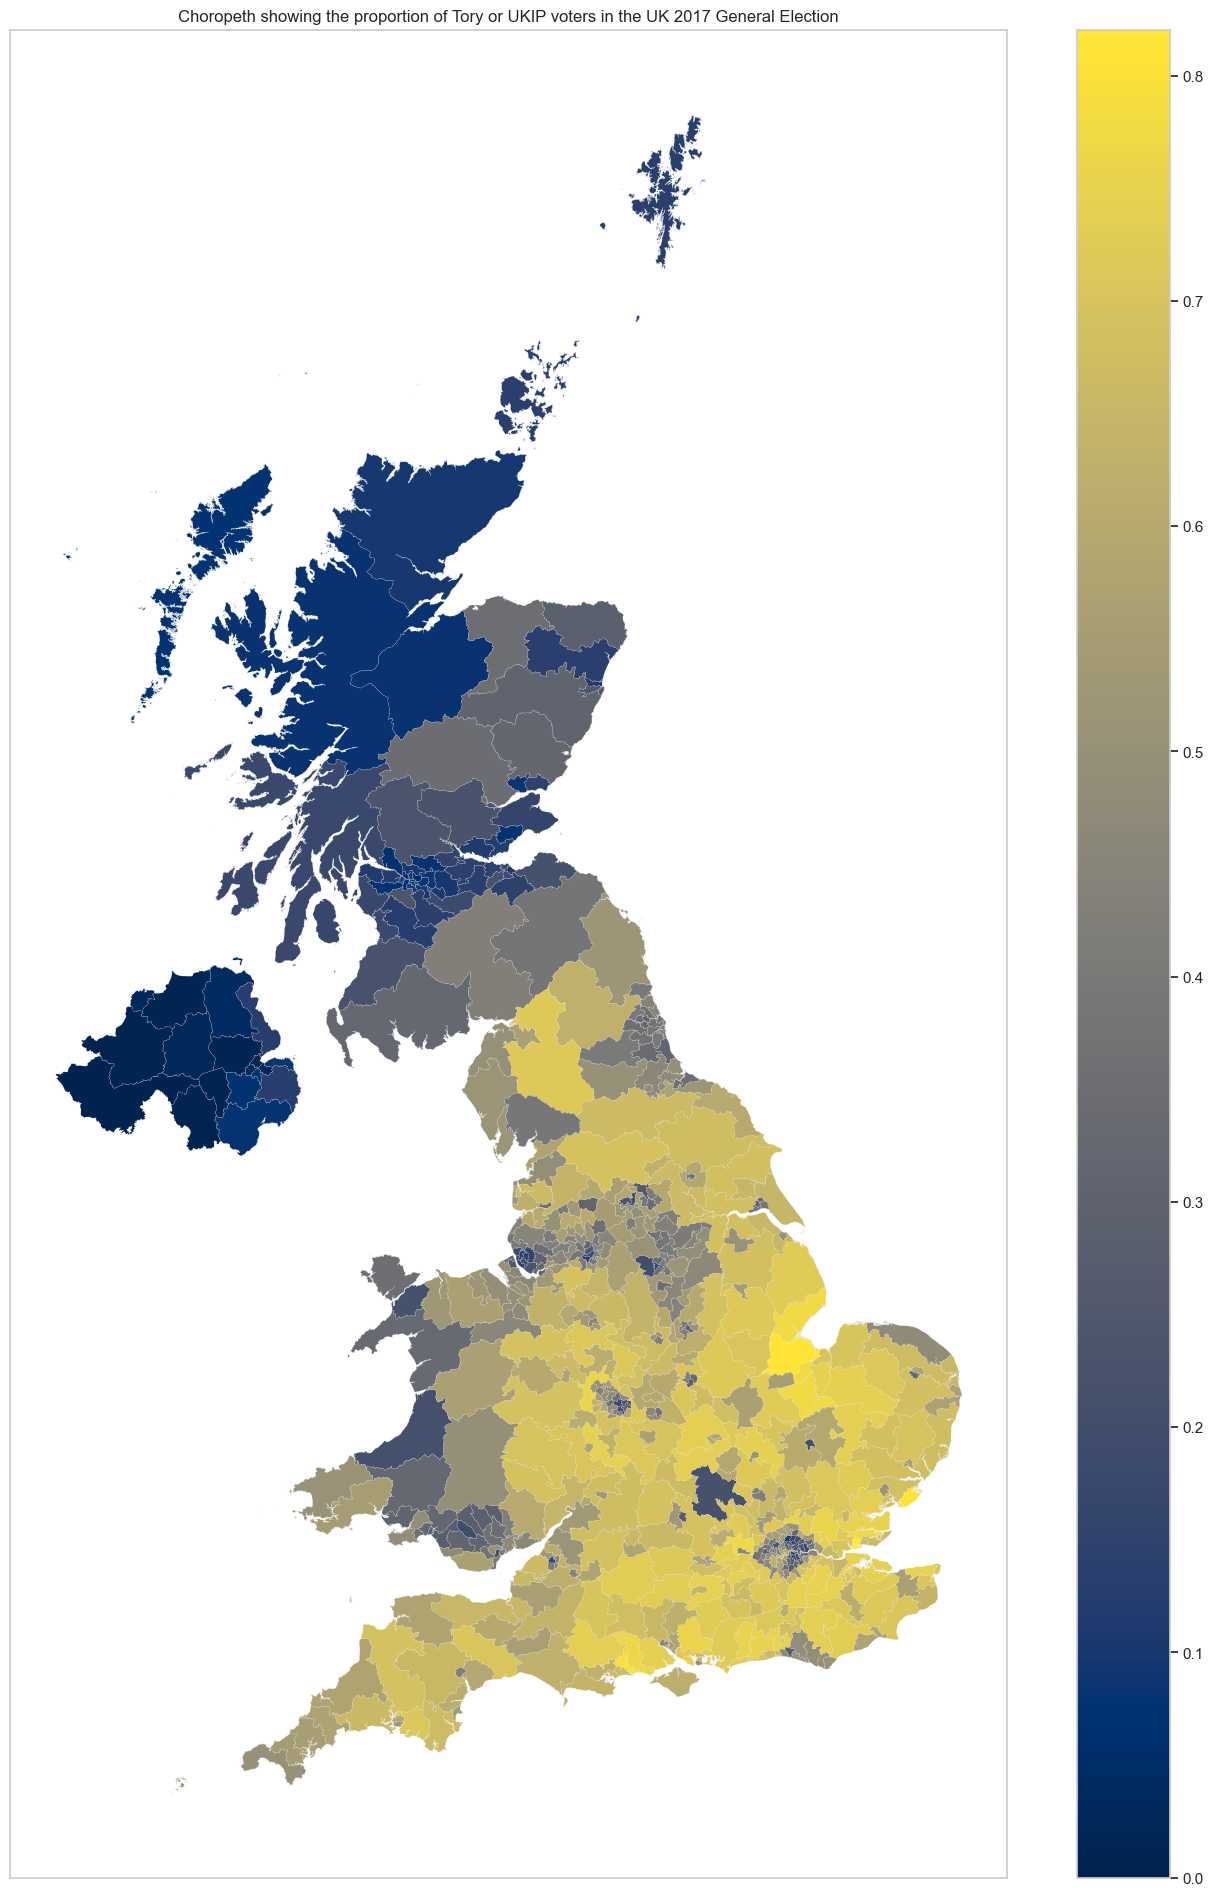

In [270]:
merge_df.plot(column="con_ratio", cmap="cividis", linewidth=0.1, edgecolor='0.9', legend=True)
plt.xticks([])
plt.yticks([])
plt.title("Choropeth showing the proportion of Tory or UKIP voters in the UK 2017 General Election")
plt.grid()
#plt.savefig('conservative_ukip_support.jpg', format='jpg', dpi=400, bbox_inches='tight')
plt.show()

In [29]:
merge_df = merge_df.drop(columns="prod_var")

In [30]:
merge_df["con_normed"] = (merge_df["con_ratio"] - merge_df["con_ratio"].min()) / (merge_df["con_ratio"].max() - merge_df["con_ratio"].min())

In [31]:
merge_df["leave_normed"] = (merge_df["leave_prop"] - merge_df["leave_prop"].min()) / (merge_df["leave_prop"].max() - merge_df["leave_prop"].min())

In [32]:
merge_df["leave_prop"].max()

0.7490000000000001

In [33]:
merge_df["leave_prop"].min()

0.205

In [34]:
merge_df["leave_normed"].max()

1.0

In [35]:
merge_df["leave_normed"].max()

1.0

In [50]:
merge_df["bin_vals"] = [1 if _ <= 0.5 else 0 for _ in merge_df["leave_prop"]]

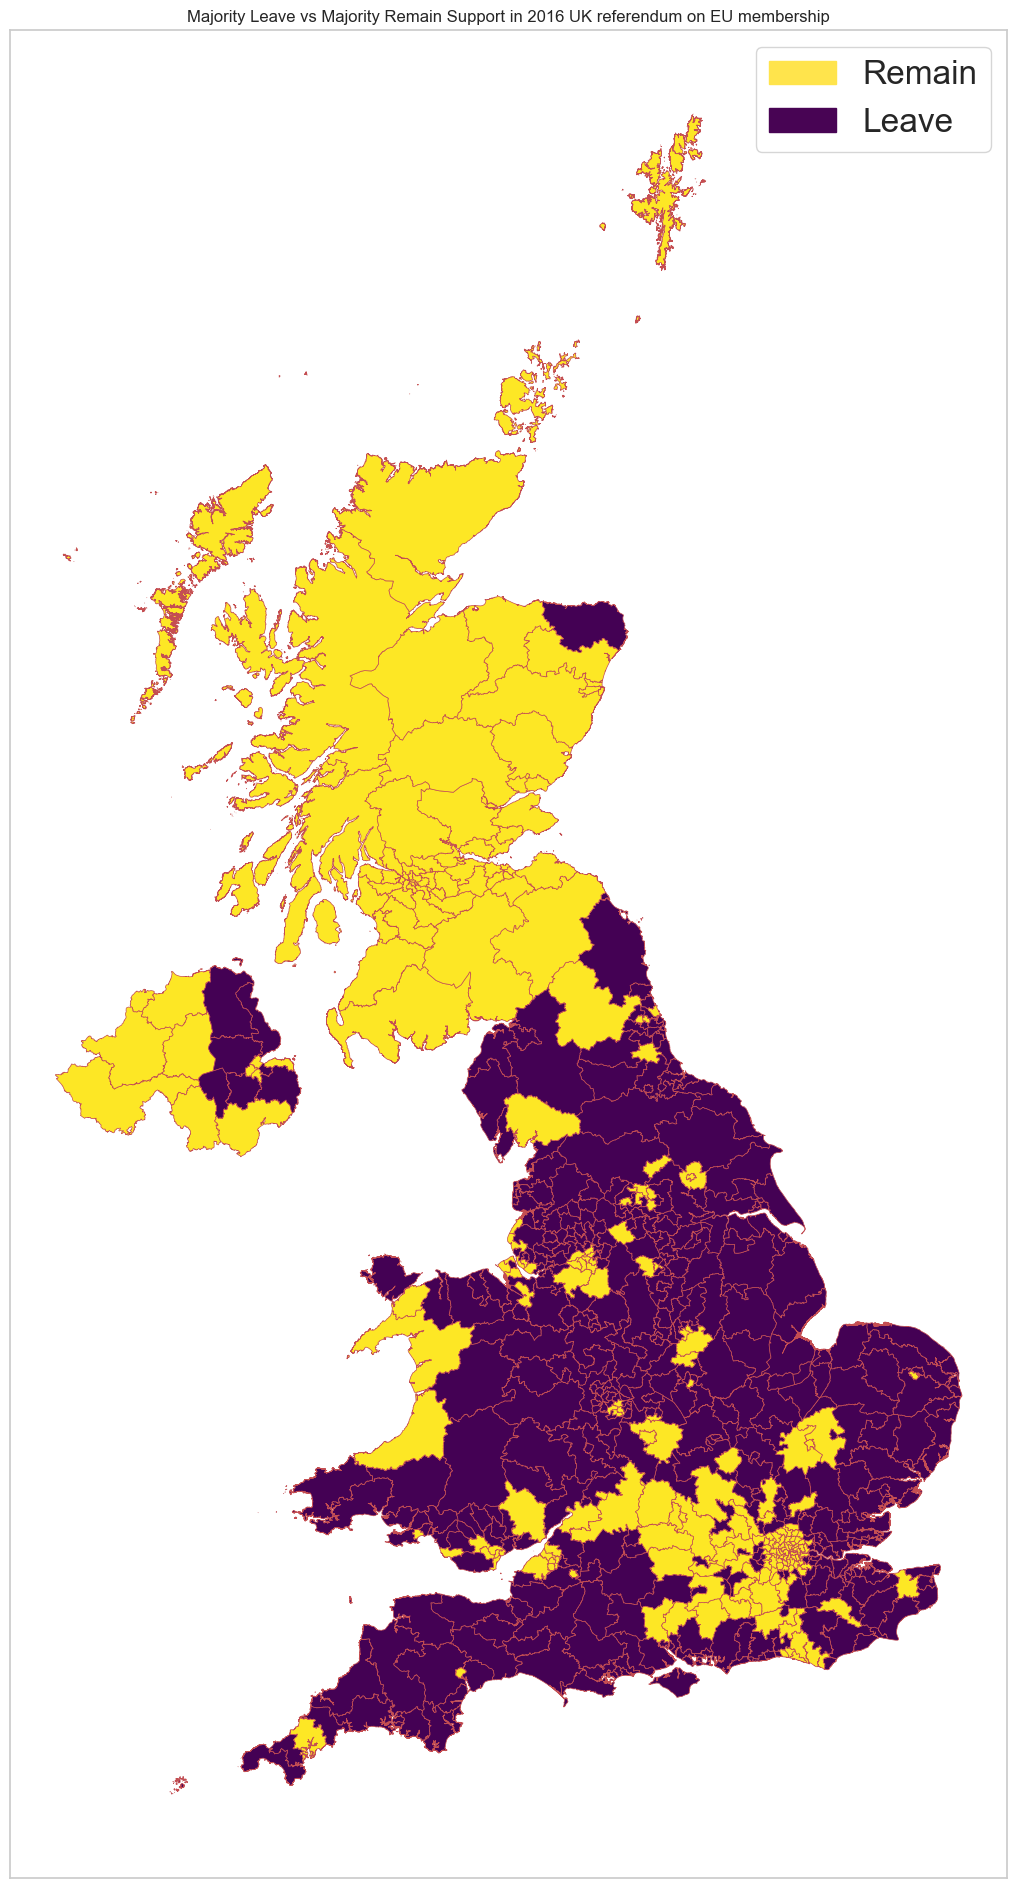

In [271]:
merge_df.plot(column="bin_vals", cmap="viridis", linewidth=0.5, edgecolor='r', legend=False)

colors = ['#ffe44c', '#480454']
labels = ['Remain', 'Leave']

legend_patches = [Patch(color=color, label=label) for color, label in zip(colors, labels)]

plt.legend(handles=legend_patches, fontsize=24)
plt.xticks([])
plt.yticks([])
plt.title("Majority Leave vs Majority Remain Support in 2016 UK referendum on EU membership")
plt.grid()
#plt.savefig('majority_support.jpg', format='jpg', dpi=400, bbox_inches='tight')
plt.show()

In [289]:
l25 = merge_df["leave_normed"].quantile(0.25)

merge_df["leave_normed"].quantile(0.25)

0.4531249999999999

In [290]:
l50 = merge_df["leave_normed"].quantile(0.50)

merge_df["leave_normed"].quantile(0.50)

0.6084558823529411

In [291]:
l75 = merge_df["leave_normed"].quantile(0.75)

merge_df["leave_normed"].quantile(0.75)

0.725643382352941

In [292]:
c25 = merge_df["con_normed"].quantile(0.25)

merge_df["con_normed"].quantile(0.25)

0.42353947156195987

In [293]:
c50 = merge_df["con_normed"].quantile(0.5)

merge_df["con_normed"].quantile(0.5)

0.6335386343673619

In [294]:
c75 = merge_df["con_normed"].quantile(0.75)

merge_df["con_normed"].quantile(0.75)

0.8020680415873206

In [296]:
def quartiles(x, low, mid, high):
    output = None
    if x < mid:
        if x < low:
            output=1
        else:
            output=2
    else:
        if x < high:
            output=3
        else:
            output=4
    return output 
        
    
    

In [297]:
merge_df["leave_qs"] = merge_df["leave_normed"].apply(lambda x: quartiles(x, low=l25, mid=l50, high=l75))

In [298]:
merge_df["con_qs"] = merge_df["con_normed"].apply(lambda x: quartiles(x, low=c25, mid=c50, high=c75))

In [299]:
#(row, column)


# 4,1 = #78ccd4
# 4,2 = #70acc4
# 4,3 = #6884b4
# 4,4 = #6064a4

# 3,1 = #a0dcdc
# 3,2 = #98b4cc
# 3,3 = #908cbc
# 3,4 = #806cac

# 2,1 = #c8e4e4
# 2,2 = #b8bcd4
# 2,3 = #b09cc4
# 2,4 = #a874b4

# 1,1 = #f0ecec
# 1,2 = #e0c4dc
# 1,3 = #d89ccc
# 1,4 = #d07cbc

col_dict = {(4,1): "#78ccd4", (4,2): "#70acc4", (4,3): "#6884b4", (4,4): "#6064a4", 
           (3,1): "#a0dcdc", (3,2): "#98b4cc", (3,3): "#908cbc", (3,4): "#806cac",
           (2,1): "#c8e4e4", (2,2): "#b8bcd4", (2,3): "#b09cc4", (2,4): "#a874b4",
           (1,1): "#f0ecec", (1,2): "#e0c4dc", (1,3): "#d89ccc", (1,4): "#d07cbc"}





In [300]:
color_order

['#78ccd4',
 '#a0dcdc',
 '#c8e4e4',
 '#f0ecec',
 '#70acc4',
 '#98b4cc',
 '#b8bcd4',
 '#e0c4dc',
 '#6884b4',
 '#908cbc',
 '#b09cc4',
 '#d89ccc',
 '#6064a4',
 '#806cac',
 '#a874b4',
 '#d07cbc']

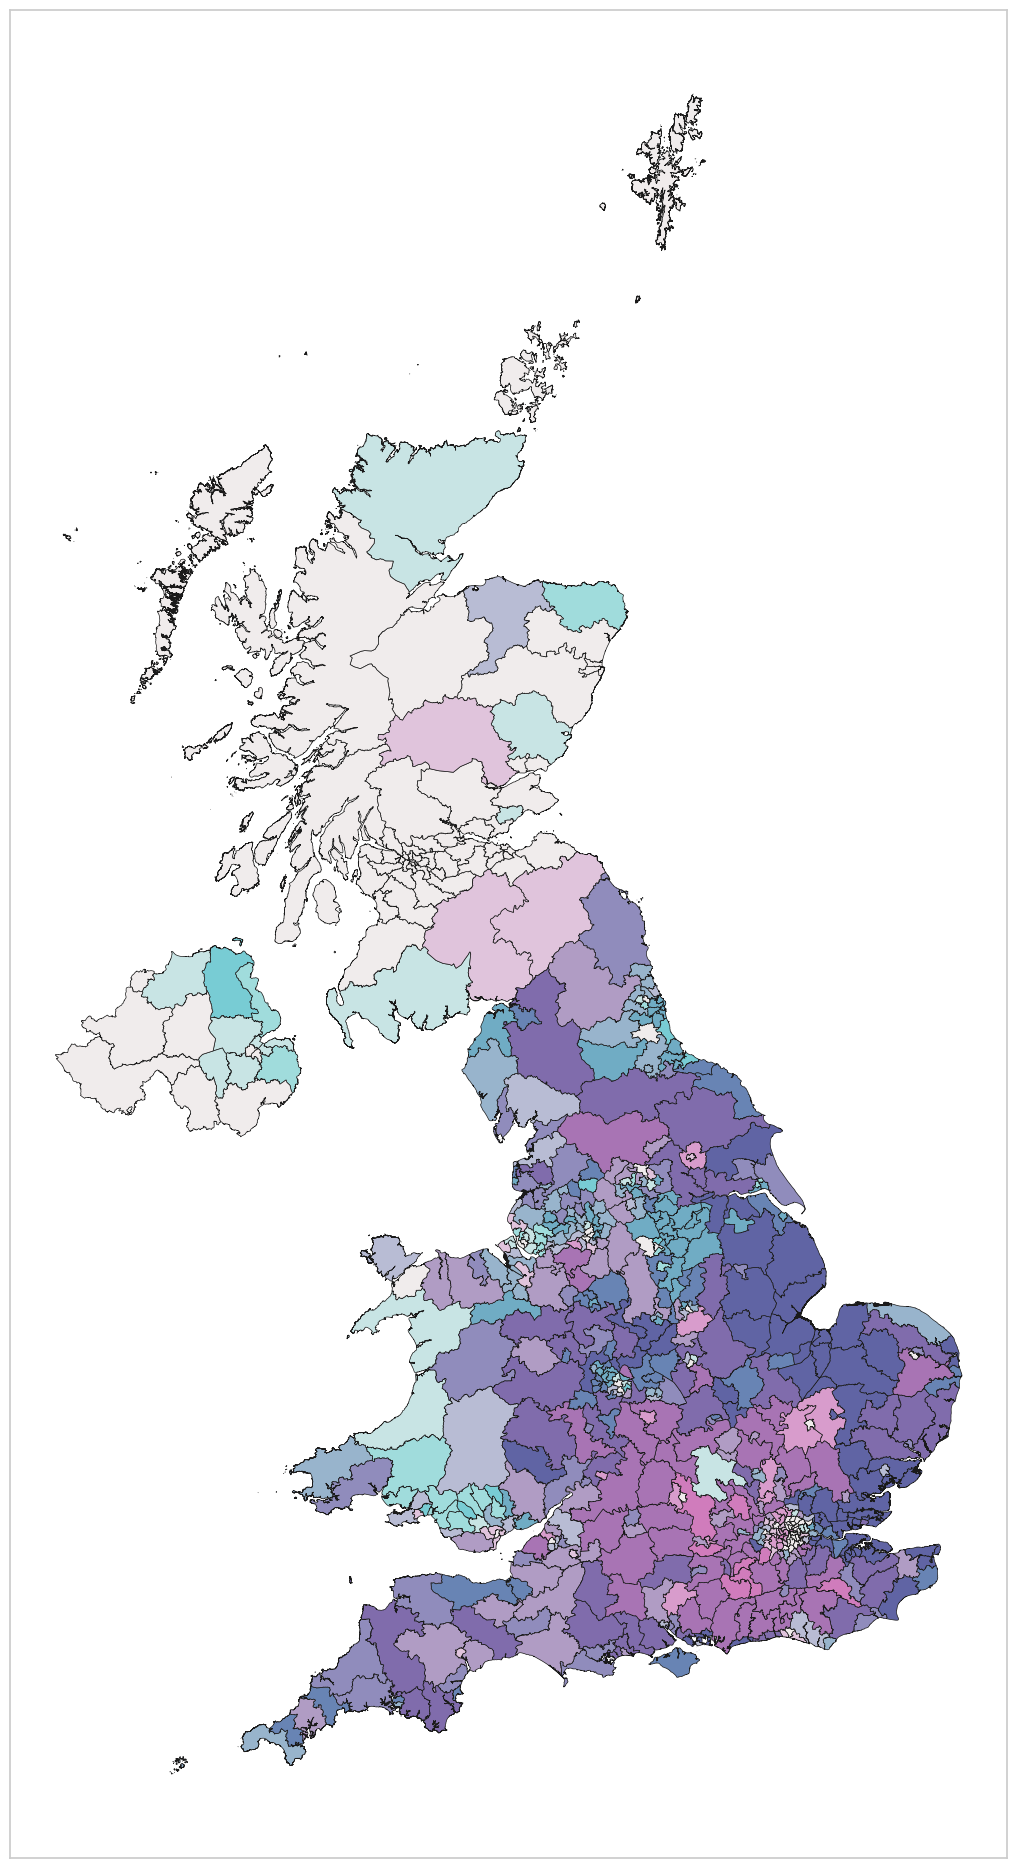

In [301]:
legend_patches = []
color_order = []

for con in range(1,5):
    for leave in range(1,5)[::-1]:

        
        merge_df[(merge_df["leave_qs"] == leave) & (merge_df["con_qs"] == con)].plot(color=col_dict[(leave, con)], linewidth=0.5, edgecolor='k', ax=plt.gca())
        legend_patches.append(Patch(color=col_dict[(leave, con)]))
        color_order.append(col_dict[(leave, con)])
        
#plt.legend(handles=legend_patches, loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=4, frameon=False, handlelength=1, handleheight=1)

plt.xticks([])
plt.yticks([])
plt.grid()
plt.show()

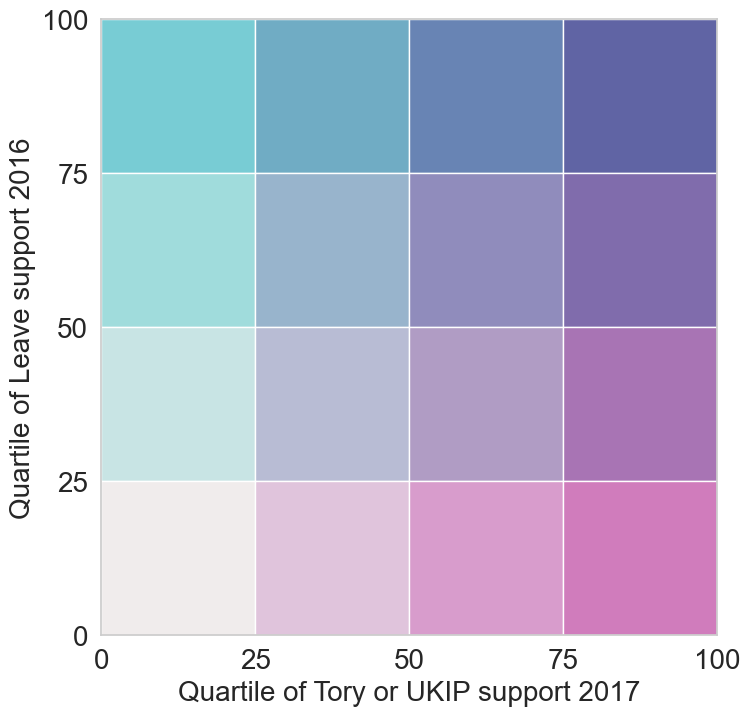

In [302]:
fig, ax = plt.subplots(1,1,figsize=(8,8))


ax.set_aspect('equal', adjustable='box')

for con in range(1,5):
    for leave in range(1,5)[::-1]:
        
        pc = PatchCollection([Rectangle((con-1,leave-1),1,1)], facecolor=col_dict[(leave, con)] )
        ax.add_collection(pc)
        
ax.set_xlim([0,4])
ax.set_ylim([0,4])
ax.set_xticks([0, 1, 2, 3, 4], [0, 25, 50, 75, 100], fontsize=20)
ax.set_yticks([0, 1, 2, 3, 4], [0, 25, 50, 75, 100], fontsize=20)
plt.xlabel("Quartile of Tory or UKIP support 2017", fontsize=20)
plt.ylabel("Quartile of Leave support 2016", fontsize=20)
ax.grid(linewidth=0)
ax.plot()
plt.show()

In [303]:
sns.set_style("whitegrid")

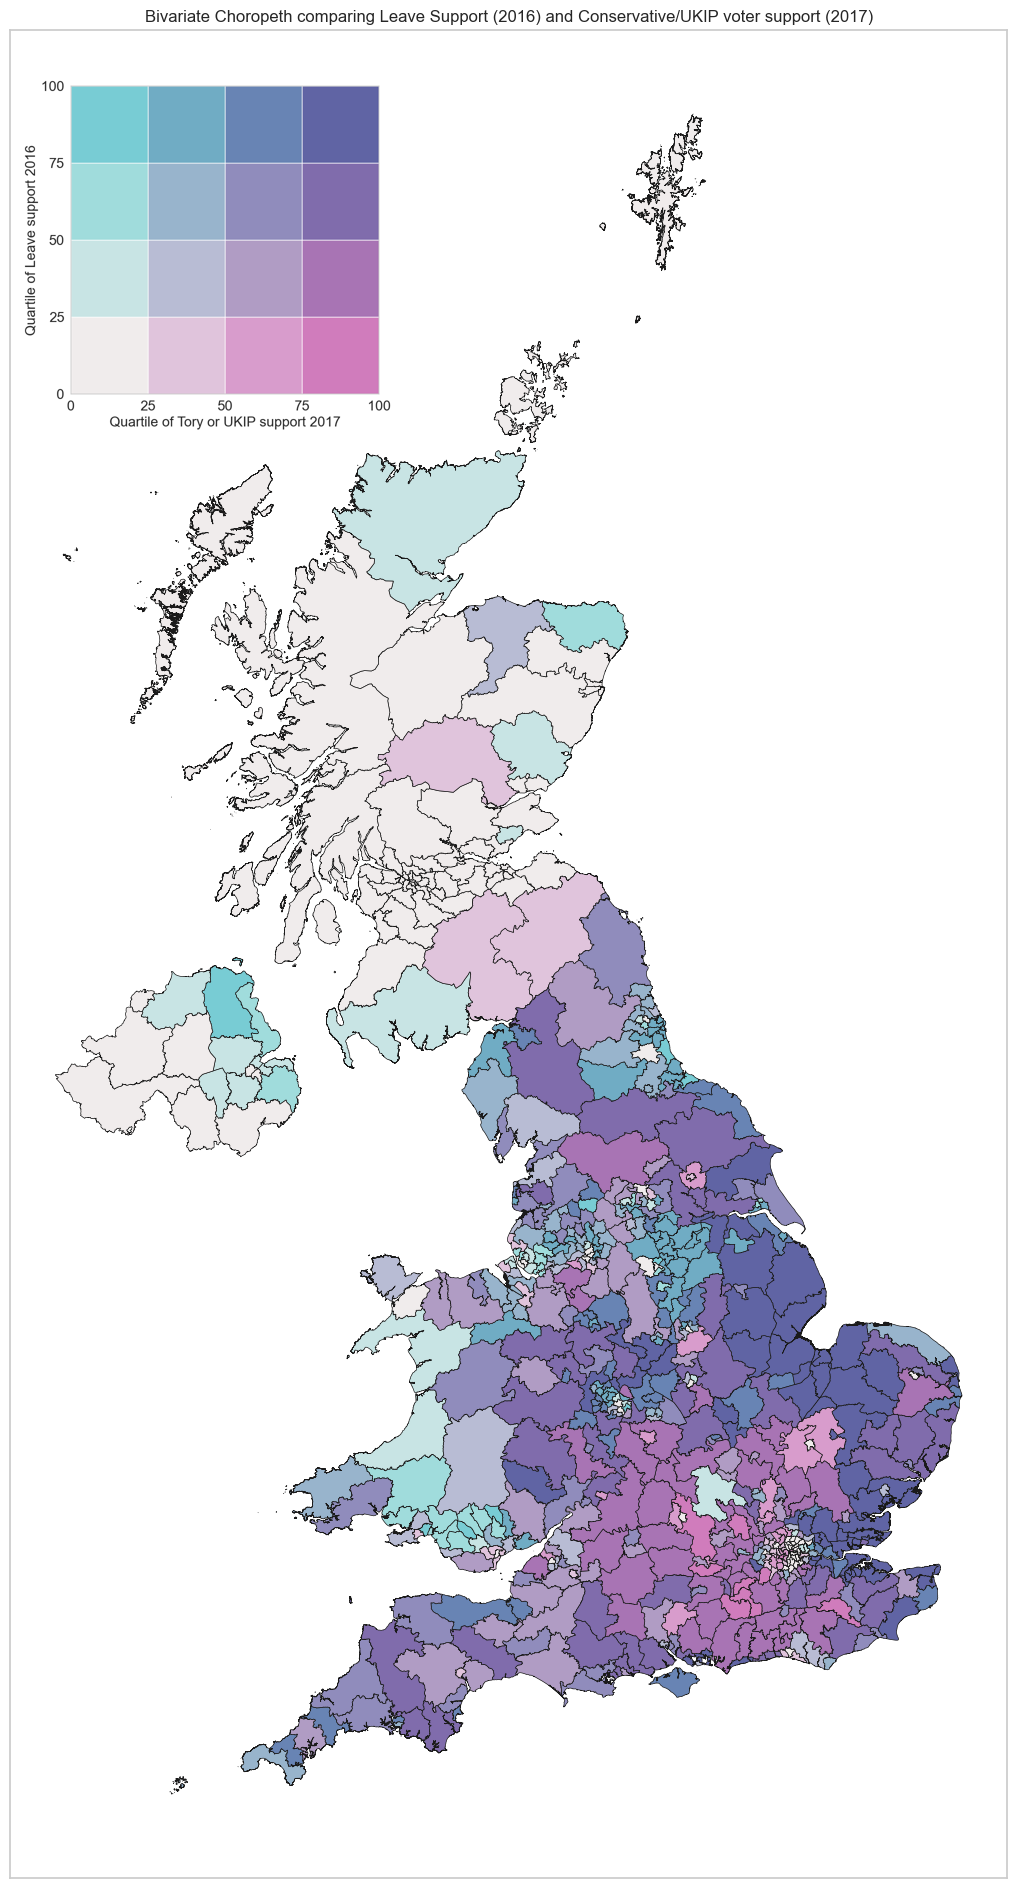

In [308]:
legend_patches = []
color_order = []

for con in range(1,5):
    for leave in range(1,5)[::-1]:

        
        merge_df[(merge_df["leave_qs"] == leave) & (merge_df["con_qs"] == con)].plot(color=col_dict[(leave, con)], linewidth=0.5, edgecolor='k', ax=plt.gca())
        legend_patches.append(Patch(color=col_dict[(leave, con)]))
        color_order.append(col_dict[(leave, con)])
        
#plt.legend(handles=legend_patches, loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=4, frameon=False, handlelength=1, handleheight=1)

ax.figure.canvas.draw()

rbga_buff = np.asarray(ax.figure.canvas.renderer.buffer_rgba())

img = Image.fromarray(rbga_buff)
img = img.resize((400,400))


plt.figimage(img, xo=20, yo=1450, origin='upper')
plt.title("Bivariate Choropeth comparing Leave Support (2016) and Conservative/UKIP voter support (2017)")
plt.xticks([])
plt.yticks([])
plt.grid()
#plt.savefig('bivariate_choropeth.jpg', format='jpg', dpi=400, bbox_inches='tight')
plt.show()